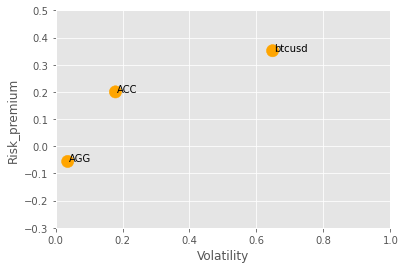

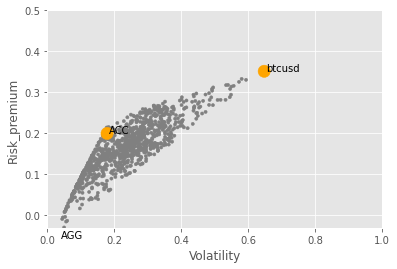

<ipython-input-34-5cb3a0d65b5c>:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  max_sharpe = random[(random['Risk_premium']>= 0)][(random['Volatility']<= 1)].sharpe.max()


In [34]:
import pandas as pd                                    # Working with tables
import numpy as np

%run teamdoge.ipynb


from tiingo import TiingoClient                       # Stock prices.
import quandl                                         # Economic data, futures prices, ...

# API keys:
tiingo = TiingoClient({'api_key':'349dd4117e5d1ed71a22f0207a8e439cf3f7b06b'})
quandl.ApiConfig.api_key = '_ci7hzC_sPkspKWz2yzt'                      # Replace the XXXX with your API key (must be inside the ' ').

import matplotlib.pyplot as plt                        # Basic plot library.
plt.style.use('ggplot')                                # Make plots look nice.
%matplotlib inline

In this notebook, we will find the efficent frontier and max sharpe ratio weights of a portfolio of ACC and AGG.

In [56]:
tickers    = ['ASX','AGG']
start_date = '3-23-2020'
end_date   = '3-23-2022'

Now let's look at the returns

In [57]:
r = returns(tickers, start_date, end_date)
r

,ASX,AGG
2020-03-23,NaN,NaN
2020-03-24,0.140187,0.008256
2020-03-25,0.051913,0.010214
2020-03-26,0.031169,0.003051
2020-03-27,-0.098237,0.004258
...,...,...
2022-03-16,0.045519,0.000743
2022-03-17,0.019048,0.001672
2022-03-18,0.013351,0.002225
2022-03-21,-0.018445,-0.009806


In [58]:
risk_premiums = rp(tickers, start_date, end_date)
risk_premiums

ASX    0.534917
AGG   -0.018103
dtype: float64

In [59]:
volatility = vol(tickers, start_date, end_date)
volatility

ASX    0.426294
AGG    0.040573
dtype: float64

In [60]:
correlation = corr(tickers, start_date, end_date)
correlation

,ASX,AGG
ASX,1.000000,0.071642
AGG,0.071642,1.000000


In [61]:
covariance = cov(tickers, start_date, end_date)
covariance

,ASX,AGG
ASX,0.181727,0.001239
AGG,0.001239,0.001646


Now we can make a mean-volatility plot to see where these two stocks stand.

<AxesSubplot:xlabel='Volatility', ylabel='Risk_premium'>

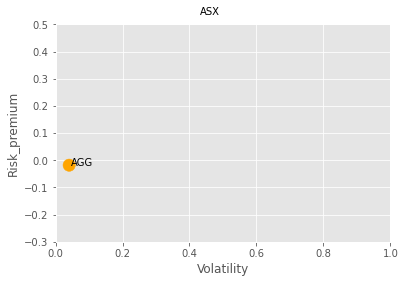

In [62]:
mean_vol_plot(risk_premiums,volatility)

We can also make an efficient frontier plot to see how different weighted combinations of these stocks would land on the mean-volatility plot.

<AxesSubplot:xlabel='Volatility', ylabel='Risk_premium'>

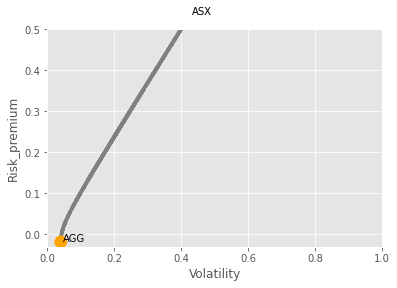

In [63]:
efficient_frontier(risk_premiums,volatility,covariance)

Time to find the weights that correspond to the maximum sharpe ratio portfolio.

In [64]:
sharpe_weights = max_sharpe_weights(risk_premiums, volatility, covariance)
sharpe_weights

,Risk_Premiums,Weights,weighted_ret
ASX,0.534917,0.995541,0.532531
AGG,-0.018103,0.004459,-0.000081


In [65]:
r = returns(tickers, start_date, end_date)
r

,ASX,AGG
2020-03-23,NaN,NaN
2020-03-24,0.140187,0.008256
2020-03-25,0.051913,0.010214
2020-03-26,0.031169,0.003051
2020-03-27,-0.098237,0.004258
...,...,...
2022-03-16,0.045519,0.000743
2022-03-17,0.019048,0.001672
2022-03-18,0.013351,0.002225
2022-03-21,-0.018445,-0.009806


In [67]:
rf = 0.011
r*sharpe_weights['Weights']
r['total_ret'] = r.ASX + r.AGG
r

,ASX,AGG,total_ret
2020-03-23,NaN,NaN,NaN
2020-03-24,0.140187,0.008256,0.148443
2020-03-25,0.051913,0.010214,0.062127
2020-03-26,0.031169,0.003051,0.034219
2020-03-27,-0.098237,0.004258,-0.093979
...,...,...,...
2022-03-16,0.045519,0.000743,0.046263
2022-03-17,0.019048,0.001672,0.020719
2022-03-18,0.013351,0.002225,0.015576
2022-03-21,-0.018445,-0.009806,-0.028251


In [68]:
r

,ASX,AGG,total_ret
2020-03-23,NaN,NaN,NaN
2020-03-24,0.140187,0.008256,0.148443
2020-03-25,0.051913,0.010214,0.062127
2020-03-26,0.031169,0.003051,0.034219
2020-03-27,-0.098237,0.004258,-0.093979
...,...,...,...
2022-03-16,0.045519,0.000743,0.046263
2022-03-17,0.019048,0.001672,0.020719
2022-03-18,0.013351,0.002225,0.015576
2022-03-21,-0.018445,-0.009806,-0.028251


In [69]:
max_rp = r.total_ret.mean()*252 - 0.011
max_rp

0.5278137897684353

In [70]:
max_vol = r.total_ret.std()*252**0.05
max_vol

0.03580574024872576

In [71]:
max_sharpe = max_rp/max_vol
max_sharpe

14.741038339159012